# The Bridge pattern

### Problem

Let's imagine that in your App you have a monolithic class that has several variants of some functionality (for example, if the class can work with various database servers).

The bigger a class becomes, the harder it is to figure out how it works, and the longer it takes to make a change. 

*The changes made to one of the variations of functionality may require making changes across the whole class*, which often results in making errors or not addressing some critical side effects.

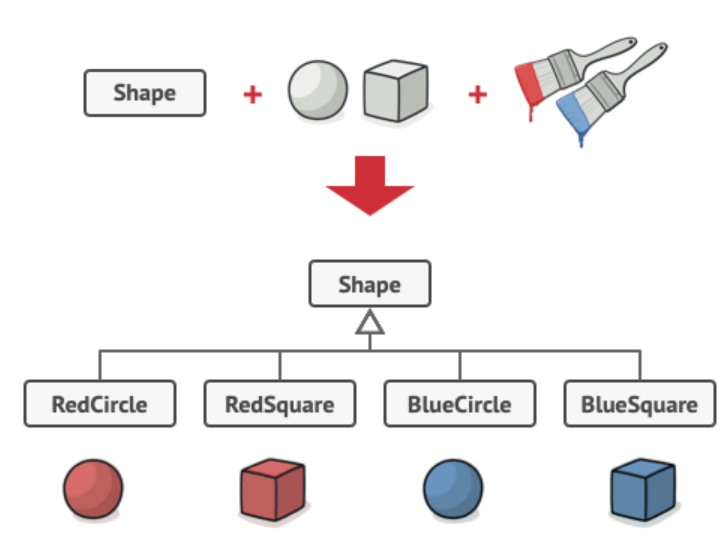

Adding new shape types and colors to the hierarchy will grow it exponentially. For example, to add a triangle shape you’d need to introduce two subclasses, one for each color. And after that, adding a new color would require creating three subclasses, one for each shape type. The further we go, the worse it becomes.

This problem occurs because we’re trying to extend the shape classes in two independent dimensions: by form and by color. That’s a very common issue with class inheritance.

### Solution

The **Bridge** pattern attempts to solve this problem` by switching from inheritance to the object composition`. 

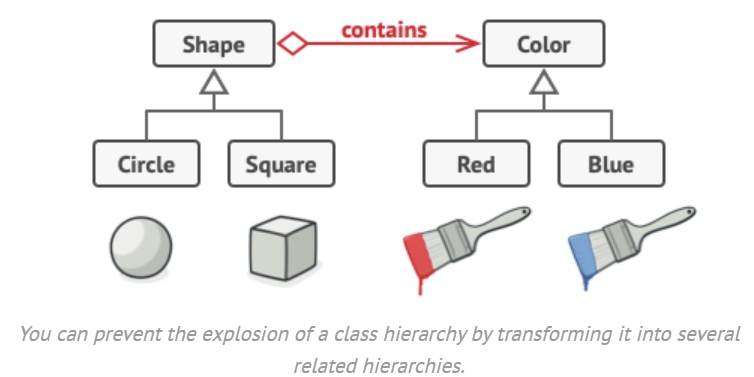

The **Bridge** Design Pattern is a structural design pattern that *decouples an **abstraction** from its **implementation**, allowing them to vary independently*. It achieves this by providing a bridge between the abstraction and its implementation, enabling changes to one without affecting the other.

### When to Use

* Divide and organize a monolithic class with multiple variants: If a class handles various functionalities, such as working with different database servers, and you want to avoid a monolithic structure.
* Extend a class in orthogonal dimensions: When you need to extend a class in multiple independent dimensions, the Bridge Pattern suggests creating separate class hierarchies for each dimension.
* Switch implementations at runtime: If you need the flexibility to replace implementation objects within the abstraction dynamically, the Bridge Pattern allows for easy implementation swapping.

The main components of the Bridge Design Pattern are:

* **Abstraction**: Defines the interface for the “abstraction” part of the system and maintains a reference to an object of the “implementation” hierarchy.
* **Refined Abstraction**: Extends the abstraction interface with additional methods or behaviors.
* **Implementation**: Defines the interface for the “implementation” part of the system.
Concrete Implementation: Provides concrete implementations of the “implementation” interface.
* **Client**: Utilizes the abstraction to interact with the implementation.

### UML Class Diagram

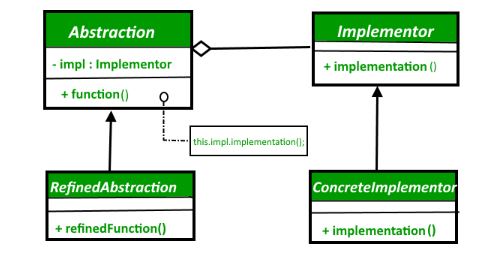

### Example 1: Basic Bridge Pattern

In [2]:
from abc import ABC, abstractmethod
# Implementor interface
class Implementor (ABC):
    @abstractmethod
    def operation_imp(self): # implementation
        pass

In [4]:
# Abstraction interface
class Abstraction (ABC):
    def __init__(self, impl: Implementor) -> None:
        self.__impl=impl
        
    @property
    def impl(self):
        return self.__impl
        
    @abstractmethod
    def function(self): 
        pass

In [5]:
# Refined Abstractions
class RefinedAbstraction1(Abstraction):
    def function(self):
        print("Refined Abstraction operation")
        self.impl.operation_imp()

In [6]:
# Concrete Implementors
class ConcreteImplementorA(Implementor):
    def operation_imp(self):
        print("Concrete Implementor A operation")

class ConcreteImplementorB(Implementor):
    def operation_imp(self):
        print("Concrete Implementor B operation")

In [8]:
#client
imp_a = ConcreteImplementorA()
imp_b = ConcreteImplementorB()

abstraction1 = RefinedAbstraction1(imp_a)
abstraction2 = RefinedAbstraction1(imp_b)

abstraction1.function()
abstraction2.function()

Refined Abstraction operation
Concrete Implementor A operation
Refined Abstraction operation
Concrete Implementor B operation


### Example 2 -Bridge Pattern with Data Parameters

This example illustrates how the Bridge pattern can help divide the monolithic code of an app that manages devices and their remote controls. 

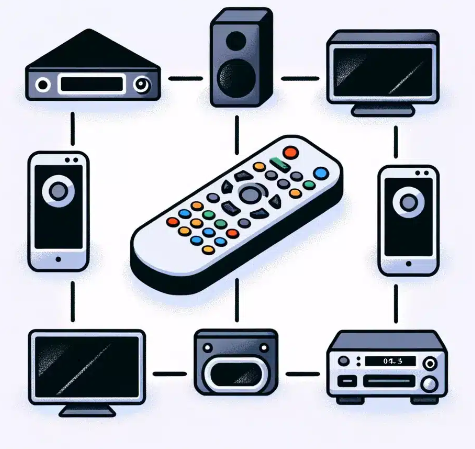

In [ ]:
from abc import ABC, abstractmethod

class CommunicationAPI(ABC): # Implementor interface
    @abstractmethod
    def send_data(self, data):
        pass

In [10]:
## Concrete Implementors

class BluetoothCommunication(CommunicationAPI):
    def send_data(self, data):
        print(f"Sending data '{data}' via Bluetooth")

class WiFiCommunication(CommunicationAPI):
    def send_data(self, data):
        print(f"Sending data '{data}' via WiFi")

In [11]:
class Device:# Abstraction
    def __init__(self, communication_api):
        self.communication_api = communication_api

    @abstractmethod
    def communicate(self, data):
        pass


In [12]:
# Refined Abstractions
class Phone(Device):
    def communicate(self, data):
        print("Communicating via Phone:")
        self.communication_api.send_data(data)

class Speaker(Device):
    def communicate(self, data):
        print("Communicating via Speaker:")
        self.communication_api.send_data(data)

In [13]:
bluetooth_communication = BluetoothCommunication()
wifi_communication = WiFiCommunication()

phone = Phone(bluetooth_communication)
speaker = Speaker(wifi_communication)

phone.communicate("Hello, phone!")
speaker.communicate("Hi, speaker!")

Communicating via Phone:
Sending data 'Hello, phone!' via Bluetooth
Communicating via Speaker:
Sending data 'Hi, speaker!' via WiFi


### Example 3. File Storage - Bridge & Factory Method composition

1. Define an abstract class representing the file storage abstraction. This class will declare methods for saving files.

In [3]:
from abc import ABC, abstractmethod

# Abstraction - Interface
class IFileStorage(ABC):      
    @abstractmethod
    def save_file(self, file_name):
        """Abstract method to save a file."""
        pass

2. Define an abstract class representing the storage implementation. This class will declare methods for saving files specific to each storage location

In [12]:
#Implementation - Interface
class IStorageImplementation(ABC):
    """Abstract class representing the storage implementation."""
    
    @abstractmethod
    def save(self, file_name):
        """Abstract method to save a file."""
        pass
    
    def __str__(self) -> str:
        return f"{self.__class__}"

3. Implement concrete classes for local storage, cloud storage, and network storage. Each class will provide a specific implementation for saving files.

In [13]:
class LocalStorage(IStorageImplementation):
    """Concrete implementation for local file storage."""
    
    def save(self, file_name):
        """Save a file locally."""
        return f"File '{file_name}' saved locally"

In [14]:
class CloudStorage(IStorageImplementation):
    """Concrete implementation for cloud file storage."""
    
    def save(self, file_name):
        """Save a file to the cloud."""
        return f"File '{file_name}' saved to the cloud"

In [15]:
class NetworkStorage(IStorageImplementation):
    """Concrete implementation for network file storage."""
    
    def save(self, file_name):
        """Save a file to a network location."""
        return f"File '{file_name}' saved to a network location"

Let's use a Factory Method to build a few different concrete implementators.

In [16]:
myObjs={'Local': LocalStorage, 'Cloud': CloudStorage, 'Network':NetworkStorage}

class Creator:
    '''The Factory Method Class'''

    @staticmethod
    def create_object(objType: str) ->IStorageImplementation: #A static method to get a concrete storage
        try:
            if objType in myObjs.keys():
                return myObjs[objType]()
            else:
                raise Exception("I can't make this object")
        except Exception as _e:
            print(_e)
        return None

4. Create a refined abstraction class that extends the file storage abstraction. This class will delegate file storage operations to the appropriate storage implementation based on runtime configurations

In [17]:
class AdvancedFileStorage(IFileStorage):
    """Refined abstraction for advanced file storage."""
    
    def __init__(self, storage_impl):
        """Initialize with a specific storage implementation."""
        self.__storage_impl = storage_impl
    
    def save_file(self, file_name):
        """Save a file using the specified storage implementation."""
        return self.__storage_impl.save(file_name)

Main section to showcase usage:

In [20]:
# The Client

# Create concrete implementations
objNames=['Local','Cloud','Network']
implementations=[]

for name in objNames:
    res=Creator.create_object(name)
    if res:
        print(res)
        implementations.append(res)

<class '__main__.LocalStorage'>
<class '__main__.CloudStorage'>
<class '__main__.NetworkStorage'>


In [21]:
implementations

In [23]:
# Create refined abstractions and link them with concrete implementations
fileName="hannaExample.txt"

for impl in implementations:
    res=AdvancedFileStorage(impl)
    if res:
         # Use refined abstractions to save files
        print(res.save_file(fileName))

File 'hannaExample.txt' saved locally
File 'hannaExample.txt' saved to the cloud
File 'hannaExample.txt' saved to a network location
